[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_xgb_densenet121.ipynb)

In [2]:
"""For Alibaba Competition

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10DYDNSM_eaFtn7lrM0CyUIXRFdIDtabS
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse






Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


In [4]:

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

aoi_aoi_test1.ipynb  PiXNet				      test for excel
aoi_test	     Sample upload.txt			      Untitled0.ipynb
Colab Notebooks      TAHU PowerPoint Template.pdf	      Untitled1.ipynb
kaggle		     TAHU PowerPoint Template - 柱狀圖 1.ods  Untitled2.ipynb
mobilenet_ssd	     tai_future_data			      Untitled3.ipynb


In [7]:
!ls drive/kaggle/ali/manu_big_data

defect_total			      guangdong_round1_train2_20180910
defect_total.zip		      guangdong_round1_train2_20180910.zip
guangdong_round1_test_a_20180910.zip  Untitled0.ipynb
guangdong_round1_train1_20180903      Untitled1.ipynb
guangdong_round1_train1_20180903.zip  Untitled2.ipynb


In [51]:

!unzip defect_total.zip  


Archive:  defect_total.zip
   creating: defect_total/
  inflating: defect_total/漏底20180901094526对照样本.jpg  
   creating: __MACOSX/
   creating: __MACOSX/defect_total/
  inflating: __MACOSX/defect_total/._漏底20180901094526对照样本.jpg  
  inflating: defect_total/桔皮20180830163935对照样本.jpg  
  inflating: __MACOSX/defect_total/._桔皮20180830163935对照样本.jpg  
  inflating: defect_total/漏底20180901092112对照样本.jpg  
  inflating: __MACOSX/defect_total/._漏底20180901092112对照样本.jpg  
  inflating: defect_total/漏底20180901094650对照样本.jpg  
  inflating: __MACOSX/defect_total/._漏底20180901094650对照样本.jpg  
  inflating: defect_total/擦花20180831110647对照样本.jpg  
  inflating: __MACOSX/defect_total/._擦花20180831110647对照样本.jpg  
  inflating: defect_total/漏底20180830133942对照样本.jpg  
  inflating: __MACOSX/defect_total/._漏底20180830133942对照样本.jpg  
  inflating: defect_total/脏点20180907110155对照样本.jpg  
  inflating: __MACOSX/defect_total/._脏点20180907110155对照样本.jpg  
  inflating: defect_total/横条压凹20180903111403对照样本.jpg  
  inflating: 

In [0]:


import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import subprocess
import os
import pickle
import sklearn 

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier




import keras.backend as K

#from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
#from keras.applications.mobilenet import MobileNet
#from keras.applications.nasnet import NASNetMobile,NASNetLarge

from keras.preprocessing import image
#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img



from keras.applications.xception import Xception, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback


from keras import regularizers
#from dummyPy import OneHotEncoder
from keras.utils import to_categorical


import time

In [0]:
file_list = os.listdir('defect_total')

In [0]:
src= 'defect_total/'
src_save = 'drive/kaggle/ali/manu_big_data/'

In [55]:
len(file_list)


500

In [0]:
pick = np.random.randint(500)

In [57]:
img0 = plt.imread(src+file_list[pick])
img0.shape

(1920, 2560, 3)

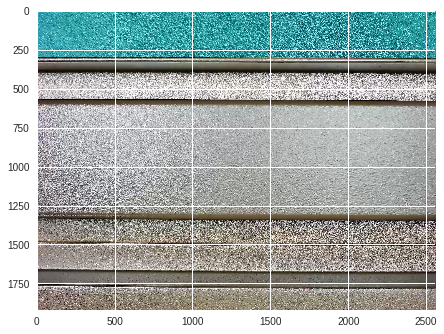

In [58]:
plt.imshow(img0)

In [59]:

# .DS_store contains in the file list
if '.DS_Store' in file_list:
    del file_list[file_list.index('.DS_Store')]
  
len (file_list)

499

In [60]:
label_list = [] # get first 2 simplex character 
for f in file_list:
    label_list.append(f[:2])
len(label_list)

499

In [61]:
# check how many failure categories
uniq_label_list = list(set(label_list))
len(uniq_label_list)

9

In [62]:
#Label Faliure Category, totally 9, 0-8
label_dict = {}
for i,l in enumerate(uniq_label_list):
    label_dict[l] = i
label_dict

{'不导': 5,
 '凸粉': 7,
 '擦花': 1,
 '桔皮': 8,
 '横条': 2,
 '涂层': 0,
 '漏底': 6,
 '碰伤': 3,
 '脏点': 4}

In [0]:
# label the image according to the defect type
label_data = []
for f in file_list:
    label_data.append(label_dict[f[:2]])
label_data = np.array(label_data)
label_df = pd.DataFrame (label_data)

In [64]:
label_df.columns = ['label']
len(label_df)

499

In [65]:
# Label Counts
label_df['label'].value_counts()

6    141
4     65
3     55
1     52
8     43
2     41
7     37
5     34
0     31
Name: label, dtype: int64

In [66]:
# one hot encoding for label (for later NN usage)
one_hot_label_data = to_categorical(label_data)
one_hot_label_data.shape

(499, 9)

In [0]:
# build model , using pre-trained Xception, include top = True
def build_model():
    inputs = Input(shape=(1920,2560,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.output
    print (x.get_shape)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    
    return model

In [68]:
model_1 = build_model()
# compile the model (should be done *after* setting layers to non-trainable)
model_1.compile(optimizer='Nadam', loss='categorical_crossentropy',metrics=['accuracy'])

<bound method Tensor.get_shape of <tf.Tensor 'fc1000/Softmax:0' shape=(?, 1000) dtype=float32>>
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1920, 2560, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 1926, 2566, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 960, 1280, 64 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 960, 1280, 64 256         conv1/conv[0][0]                 
_____________

In [0]:
def first_prediction(model,data):
    pred_temp = model.predict(data)
    return pred_temp


In [0]:
# assign batch inferefcing of pre-traianed model to be 4 

def make_batch (file_ist,batch_size):
  final_list =[]
  
 
  floor = int(np.floor(len(file_list)/batch_size))
  print ('floor=', floor)
  for i in range(floor+1):
      if i < floor:
          final_list.append(file_list[i*batch_size:(i+1)*batch_size])
      else: 
          final_list.append(file_list[i*batch_size:])
          
  # check final_llist len equal to file_list  
  a =0 
  for l in final_list:
    #print (len(l))
    #print (l[-10:])
    a += len(l)
  if (a - len(final_list) == 0):  
    print ('total size', a, 'final_list length equal to file_list')
  else:
    print ('total size', a, 'file_list', len(file_list),'final_list length NOT equal to file_list')
    print (a - len(file_list))
    print ('warning, something wrong')
    
  return final_list  




In [92]:
batch_size = 5
final_list = make_batch(file_list,batch_size)
print (len(final_list))

floor= 99
total size 499 file_list 499 final_list length NOT equal to file_list
0
warning, something wrong
100


In [98]:
s= time.time()
final_array = []
for j,l in enumerate(final_list):
      img_list=[]
      for i,img in enumerate(l):
          img = load_img('defect_total/'+img)  
          x = img_to_array(img)
          x = preprocess_input(x)
          #print (x.shape)
          #x = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
          #x = x/127.5 -1.
          img_list.append(x)
      #print ('img_list=', len(img_list))
      testing_data = np.array(img_list)

      #print ('testing_data_shape', testing_data.shape)
      #train_data =  train_data[:,:,:,np.newaxis]
      #print (testing_data.shape)
      pred_temp = first_prediction(model_1,testing_data)

      print('batch = ', j, 'stage 1 completed', 'shape=', pred_temp.shape)
      np.save(src_save+'temp_'+str(j)+'.npy',pred_temp)

      print ('bacth npy saved', j)
      e = time.time()
      print ('batch',j,'time=', round(e -s ,4))

      final_array.append(pred_temp)
      print ('afterbatch',j,'length=', len(final_array))

final_array = np.concatenate(final_array)
print ('final array', final_array.shape)
np.save(src_save+'train_data_densenet.npy',final_array)
print ('totally done, train data densent.npy')

batch =  0 stage 1 completed shape= (5, 1000)
bacth npy saved 0
batch 0 time= 7.1961
afterbatch 0 length= 1
batch =  1 stage 1 completed shape= (5, 1000)
bacth npy saved 1
batch 1 time= 16.4412
afterbatch 1 length= 2
batch =  2 stage 1 completed shape= (5, 1000)
bacth npy saved 2
batch 2 time= 25.0226
afterbatch 2 length= 3
batch =  3 stage 1 completed shape= (5, 1000)
bacth npy saved 3
batch 3 time= 33.6171
afterbatch 3 length= 4
batch =  4 stage 1 completed shape= (5, 1000)
bacth npy saved 4
batch 4 time= 42.3486
afterbatch 4 length= 5
batch =  5 stage 1 completed shape= (5, 1000)
bacth npy saved 5
batch 5 time= 50.9341
afterbatch 5 length= 6
batch =  6 stage 1 completed shape= (5, 1000)
bacth npy saved 6
batch 6 time= 59.4692
afterbatch 6 length= 7
batch =  7 stage 1 completed shape= (5, 1000)
bacth npy saved 7
batch 7 time= 68.1103
afterbatch 7 length= 8
batch =  8 stage 1 completed shape= (5, 1000)
bacth npy saved 8
batch 8 time= 77.5561
afterbatch 8 length= 9
batch =  9 stage 1 c

In [0]:
np.save(src_save+'train_data_densenet.npy',final_array)

In [99]:
final_array = np.concatenate(final_array)
final_array.shape

(499, 1000)

In [101]:
len(label_data)

499

In [0]:
train_x,val_x,train_y,val_y = train_test_split(final_array,label_data,test_size=0.2,shuffle=True)

In [104]:

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1.fit(train_x,train_y)


from sklearn.metrics import accuracy_score
val_pred = xgb1.predict(val_x)

predictions = [round(value) for value in val_pred]
# evaluate predictions
accuracy = accuracy_score(val_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 92.00%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
import pickle
with open (src_save+'xgb_densenet12.pkl','wb') as handle:
  pickle.dump(xgb1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [108]:
print (val_x.shape, val_y.shape)

(100, 1000) (100,)


In [109]:
print (predictions)

[4, 5, 0, 8, 7, 1, 5, 6, 4, 7, 6, 6, 0, 3, 8, 0, 2, 8, 6, 0, 8, 4, 4, 7, 6, 1, 4, 1, 8, 8, 6, 8, 4, 8, 6, 0, 2, 8, 6, 4, 6, 4, 1, 6, 8, 3, 6, 2, 6, 8, 6, 7, 4, 1, 0, 8, 1, 3, 3, 4, 5, 4, 6, 0, 2, 6, 6, 3, 2, 8, 1, 0, 6, 6, 3, 3, 2, 2, 4, 0, 8, 6, 1, 6, 6, 7, 8, 5, 1, 7, 6, 3, 6, 6, 6, 4, 6, 8, 2, 4]


In [110]:
print (val_y)

[4 5 0 8 7 3 5 6 4 1 6 6 0 3 8 0 2 8 6 0 8 4 4 7 6 1 4 1 1 8 6 8 4 8 6 0 2
 8 6 4 6 1 1 6 8 3 6 2 6 8 6 1 4 1 0 8 4 3 3 4 5 4 6 0 2 6 6 3 2 8 1 0 6 6
 3 3 2 2 4 0 8 6 1 6 6 7 8 5 1 1 6 4 6 6 6 4 6 8 2 4]
